## Krisis Keuangan di Indonesia

Data yang digunakan adalah tentang terjadinya krisis keuangan di Indonesia. Variabel input (Prediktor) berupa 12 indikator makroekonomi Indonesia, sedangkan variabel output (target) merupakan kondisi krisis keuangan di Indonesia <br>
0 : Tidak Terjadi Krisis Keuangan <br>
1 : Terjadi Krisis Keuangan <br>

### Import Library

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [167]:
data=pd.read_csv("D:/Labs Challenges/data.csv",sep=";")

### Data Understanding

In [168]:
#Cek 5 data teratas
data.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


In [169]:
#cek dimensi data
data.shape

(270, 14)

In [170]:
#cek info dari masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

In [171]:
#melihat ringkasan statistik dari masing-masing variabel
data.iloc[:,1:].describe()

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


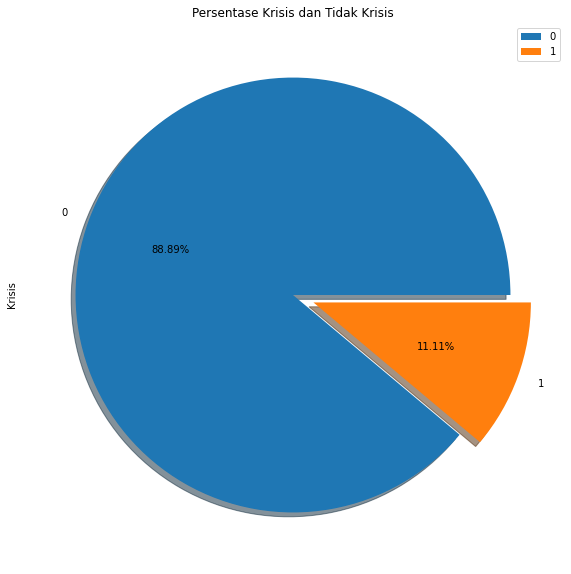

In [172]:
plt.figure(figsize=(10,10))
data['Krisis'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Persentase Krisis dan Tidak Krisis")
plt.legend()
plt.show()

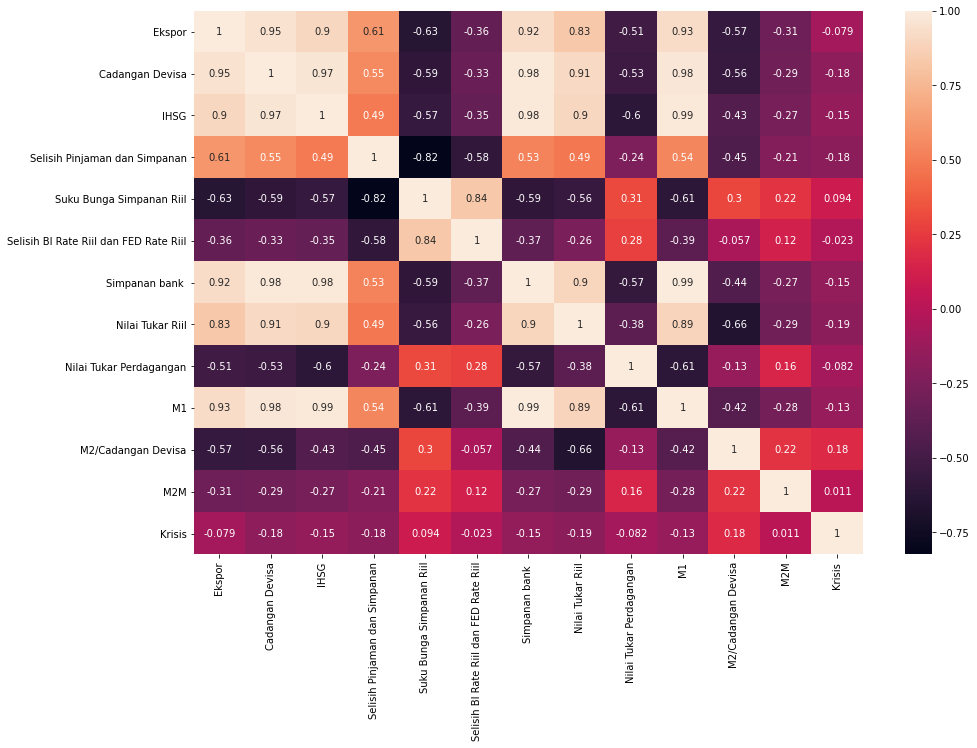

In [173]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.drop(columns="Id",axis=1).corr(),annot=True)
plt.show()

<Figure size 1440x1080 with 0 Axes>

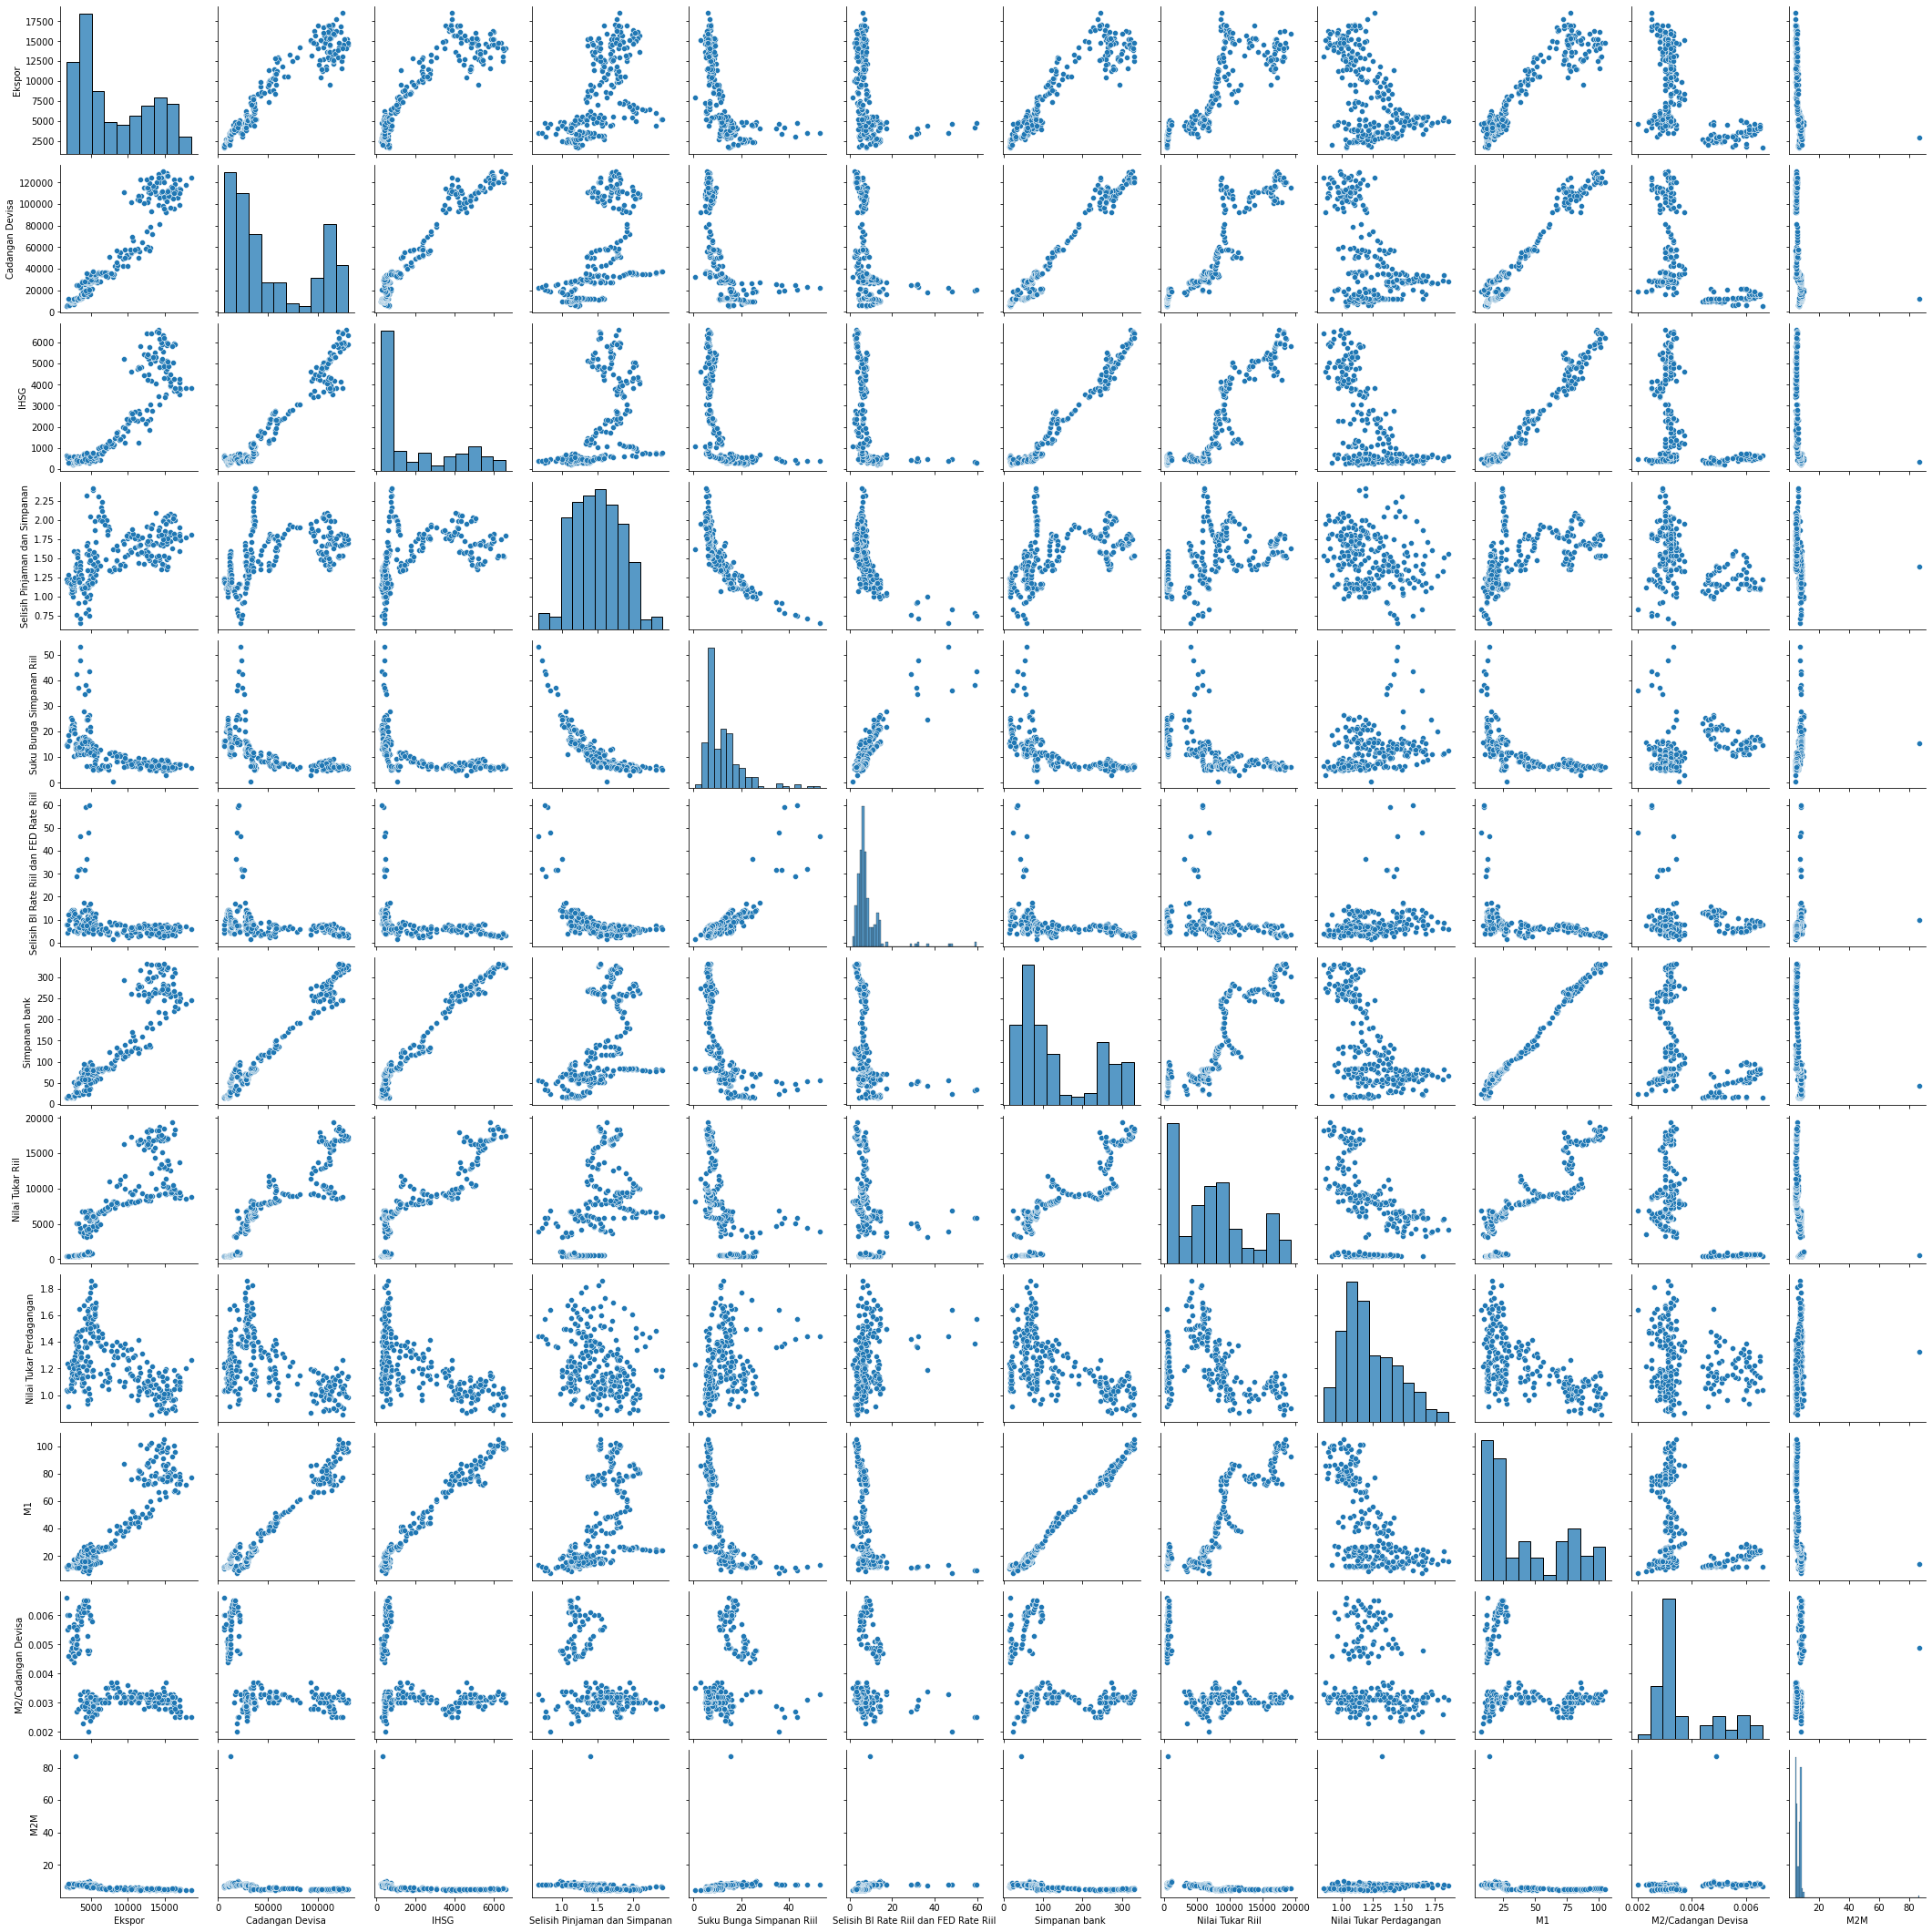

In [174]:
plt.figure(figsize=(20,15))
sns.pairplot(data=data.drop(columns=["Id","Krisis"],axis=1))
plt.show()

### Data Preparation

#### Cek Tipe Data

In [175]:
#Check Data Type
data.dtypes

Id                                          int64
Ekspor                                    float64
Cadangan Devisa                           float64
IHSG                                      float64
Selisih Pinjaman dan Simpanan             float64
Suku Bunga Simpanan Riil                  float64
Selisih BI Rate Riil dan FED Rate Riil    float64
Simpanan bank                             float64
Nilai Tukar Riil                          float64
Nilai Tukar Perdagangan                   float64
M1                                        float64
M2/Cadangan Devisa                        float64
M2M                                       float64
Krisis                                      int64
dtype: object

#### Cek missing value

In [176]:
#Check the missing value
data.isnull().sum()

Id                                        0
Ekspor                                    0
Cadangan Devisa                           0
IHSG                                      0
Selisih Pinjaman dan Simpanan             0
Suku Bunga Simpanan Riil                  0
Selisih BI Rate Riil dan FED Rate Riil    0
Simpanan bank                             0
Nilai Tukar Riil                          0
Nilai Tukar Perdagangan                   0
M1                                        0
M2/Cadangan Devisa                        0
M2M                                       0
Krisis                                    0
dtype: int64

#### Cek Outlier

In [177]:
#Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [178]:
outlier(data["Ekspor"])

Number of Outlier 0


In [179]:
outlier(data["Cadangan Devisa"])

Number of Outlier 0


In [180]:
outlier(data["IHSG"])

Number of Outlier 0


In [181]:
outlier(data["Selisih Pinjaman dan Simpanan"])

Number of Outlier 0


In [182]:
outlier(data["Suku Bunga Simpanan Riil"])

Number of Outlier 8
Outlier observation row:
77
78
79
80
81
82
83
84


C:\Users\nanah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suku Bunga Simpanan Riil'>

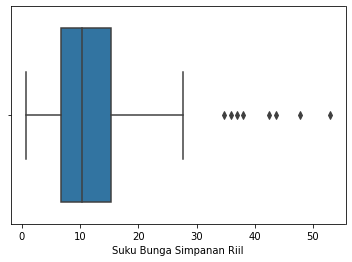

In [183]:
sns.boxplot(data["Suku Bunga Simpanan Riil"])

In [184]:
outlier(data["Selisih BI Rate Riil dan FED Rate Riil"])

Number of Outlier 12
Outlier observation row:
70
75
76
77
78
79
80
81
82
83
84
85


C:\Users\nanah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selisih BI Rate Riil dan FED Rate Riil'>

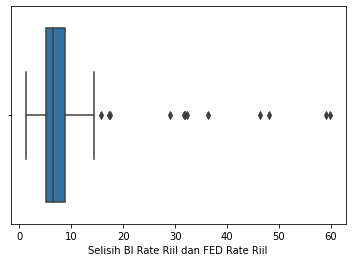

In [185]:
sns.boxplot(data["Selisih BI Rate Riil dan FED Rate Riil"])

In [186]:
outlier(data["Simpanan bank "])

Number of Outlier 0


In [187]:
outlier(data["Nilai Tukar Riil"])

Number of Outlier 0


In [188]:
outlier(data["Nilai Tukar Perdagangan"])

Number of Outlier 1
Outlier observation row:
93


C:\Users\nanah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nilai Tukar Perdagangan'>

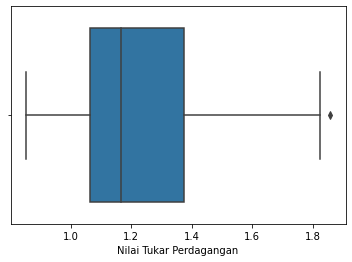

In [189]:
sns.boxplot(data["Nilai Tukar Perdagangan"])

In [190]:
outlier(data["M1"])

Number of Outlier 0


In [191]:
outlier(data["M2/Cadangan Devisa"])

Number of Outlier 0


In [192]:
outlier(data["M2M"])

Number of Outlier 1
Outlier observation row:
30


C:\Users\nanah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='M2M'>

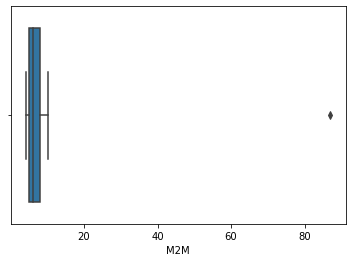

In [193]:
sns.boxplot(data["M2M"])

In [194]:
#See observation outliers on the totalcharges variable
Q1=data["M2M"].quantile(0.25)
Q3=data["M2M"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["M2M"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
30,38,2958.0,12204.5,314.1,1.39,15.38,9.64,43.860656,509.62,1.3235,14.32,0.0049,86.97,0


In [195]:
data.loc[(data["M2M"]>upper_range),"M2M"]=upper_range

### Data Partition

In [196]:
from sklearn.model_selection import train_test_split

#Menghapus kolim ID
data=data.drop(["Id"],axis=1)

#Memisah variabel prediktor dan target
x=data.drop(["Krisis"],axis=1)
y=data["Krisis"]

##partition data into data training and data testing
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = .20 ,random_state = 112)

### Synthetic Minority Oversampling Technique (SMOTE)

In [197]:
from imblearn.over_sampling import SMOTE

#memisah nama kolom variabel prediktor dan target
y_cols=["Krisis"]
x_cols= [x for x in data.columns if x not in y_cols]

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(x_train,y_train)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=x_cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=y_cols)

In [198]:
#proporsi sebelum SMOTE
y_train.value_counts()

0    192
1     24
Name: Krisis, dtype: int64

In [199]:
#proporsi setelah SMOTE
train_smote_Y["Krisis"].value_counts()

1    192
0    192
Name: Krisis, dtype: int64

### Modeling

#### Random Forest

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Modeling dengan Random Forest
rfc=RandomForestClassifier(random_state=123)

#menentukan hyperparameter yang optimal
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [201]:
#membangun model dengan grid search Cross validation
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nanah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [202]:
#best hyperparameter
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [203]:
#akurasi model terbaik di data training
CV_rfc.best_score_

0.9791666666666666

##### Evaluation

In [204]:
#memprediksi data testing
pred=CV_rfc.predict(x_test)

In [205]:
#akurasi di data testing
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0


In [206]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(y_test, pred)
CF

array([[48,  0],
       [ 0,  6]], dtype=int64)

In [155]:
y_test.value_counts()

0    51
1     3
Name: Krisis, dtype: int64

In [207]:
from sklearn.metrics import classification_report
#melihat classification report
target_names = ['No','Yes']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        48
         Yes       1.00      1.00      1.00         6

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [51]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Prediksi data predict.csv

In [208]:
data_baru=pd.read_csv("D:/Labs Challenges/predict.csv",sep=";")

In [209]:
data_baru.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M
0,2,1803.0,5914.1,638.79,1.26,14.73,3.92,15.655003,380.27,1.6888,12.27,0.0062,5.78
1,3,1802.0,5259.7,636.40,1.23,15.13,4.32,15.321895,384.14,1.0033,11.56,0.0071,6.92
2,7,2603.0,6514.5,468.51,1.15,17.85,9.96,17.309013,397.46,1.1523,12.33,0.0063,7.02
3,8,2639.0,6826.8,416.49,1.12,18.42,10.05,17.449252,400.90,1.4283,12.05,0.0061,7.14
4,11,2554.0,8539.8,383.02,1.17,20.61,12.36,18.391736,410.74,1.3151,12.04,0.0052,7.84


In [63]:
prediksi_data_baru=CV_rfc.predict(data_baru.drop(columns=["Id"],axis=1))

In [64]:
data_baru["krisis"]=prediksi_data_baru

In [65]:
submission=data_baru.loc[:,["Id","krisis"]]
submission.head()

,Id,krisis
0,2,1
1,3,1
2,7,0
3,8,0
4,11,0


In [66]:
submission.to_csv("jawaban.csv")